# **Overfitting and Underfitting in Decision Trees**
Decision trees are a type of supervised learning algorithm used in classification and regression tasks. Overfitting and underfitting are common issues encountered when building decision tree models. Let's discuss each:

**Overfitting:**

**Definition:**
Overfitting occurs when the decision tree model captures noise and patterns that are not present in the true relationship between the features and the target variable. The model becomes too complex and fits the training data too closely. As a result, the model's performance degrades when applied to new, unseen data.

**Causes:**
- **Deep Trees:** Decision trees with too many levels or nodes tend to overfit the training data. As the tree gets deeper, it captures more details of the training data, including noise, which may not be present in the test data.
- **Small Minimum Samples per Leaf:** A small minimum number of samples required to be at a leaf node can also cause overfitting. This condition allows the tree to make decisions based on very few data points, leading to a high variance in the model.
- **No Pruning:** Decision trees, by default, are grown until all leaves are pure (i.e., they only contain data points from a single class). Without pruning, the decision tree will continue to grow and potentially overfit the data.

**Signs of Overfitting:**
- High accuracy on training data but low accuracy on testing data.
- Decision boundaries that are too complex and irregular.
- The model performs well on the training set but poorly on unseen data.

**Solutions to Overfitting:**
- **Pruning:** Prune the decision tree to remove unnecessary nodes and limit its depth.
- **Increase Minimum Samples per Leaf:** Increase the minimum number of samples required to be at a leaf node.
- **Limit Tree Depth:** Limit the maximum depth of the tree.
- **Cross-Validation:** Use cross-validation techniques such as k-fold cross-validation to tune hyperparameters and evaluate model performance.

**Underfitting:**

**Definition:**
Underfitting occurs when the decision tree model is too simple to capture the underlying structure of the data. The model fails to learn the relationships between the features and the target variable, resulting in poor performance on both the training and testing data.

**Causes:**
- **Shallow Trees:** Decision trees with too few levels or nodes may not fully capture the underlying structure of the data. The model is too simplistic and does not learn enough from the training data.
- **Large Minimum Samples per Leaf:** A large minimum number of samples required to be at a leaf node can also cause underfitting. This condition may lead to a lack of flexibility in the model.
- **High Bias:** The model is biased and makes oversimplified assumptions about the data.

**Signs of Underfitting:**
- Low accuracy on both training and testing data.
- Decision boundaries that are too simplistic and fail to capture the underlying patterns in the data.
- The model performs poorly on both the training set and unseen data.

**Solutions to Underfitting:**
- **Increase Complexity:** Increase the maximum depth of the tree or decrease the minimum number of samples required to be at a leaf node.
- **Feature Engineering:** Introduce additional features or transformations of existing features to help the model capture the underlying patterns.
- **Change Model:** Switch to a more complex model that can better capture the underlying structure of the data, such as a Random Forest or Gradient Boosting model.

**Conclusion:**

Balancing between overfitting and underfitting is crucial when building decision tree models. Regularization techniques such as pruning, limiting the tree depth, and adjusting hyperparameters help to strike the right balance between the model's complexity and its ability to generalize to new, unseen data. Regular monitoring of model performance using techniques like cross-validation is essential to ensure the decision tree model's effectiveness in real-world scenarios.

## **Import Required Libraries**

In [1]:
# %pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from ipywidgets import interact, IntSlider, Dropdown, Layout

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

## **Generate a Data for Classification**

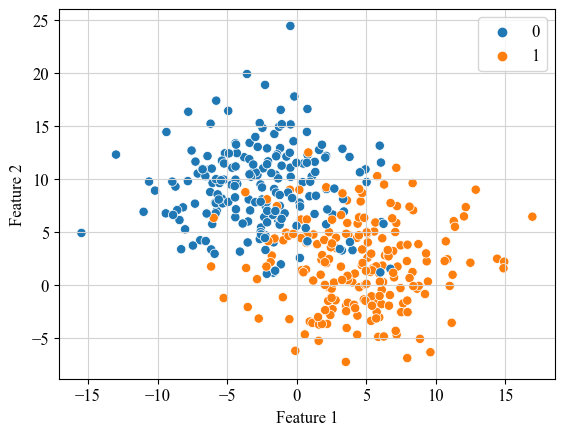

In [3]:
X, y = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=4, random_state=42)

# Plot the data
plt.figure()
plt.grid(c="lightgrey")
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=45)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

## **Train Test Split**

In [4]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((280, 2), (120, 2))

## **Build the Algorithm to Plot the Decision Boundary**

In [5]:
# Define function to visualize decision boundary
def plot_decision_boundary(criterion='gini', splitter='best', max_depth=None, 
                           min_samples_split=2, min_samples_leaf=1):
    
    # Train the Decision Tree Classifier
    clf = DecisionTreeClassifier(criterion=criterion,
                                 splitter=splitter,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 random_state=42)
    
    clf.fit(X_train, y_train)
    
    # Evaluate the accuracy on training and testing data
    y_pred_train = clf.predict(X_train)
    training_accuracy = accuracy_score(y_train, y_pred_train)
    
    y_pred_test = clf.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Plot the decision boundary
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    plot_decision_regions(X, y, clf=clf, ax=ax)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(f"""Decision Region of the Classifier
    criterion={criterion}, max_depth={max_depth}, splitter={splitter}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}
    Training Accuracy={training_accuracy.round(2)}, Validating Accuracy={testing_accuracy.round(2)}""")
    plt.show();

## **Create an Interactive Widget**

In [6]:
style = {'description_width': 'initial'}
interact(plot_decision_boundary, 
         max_depth=IntSlider(min=1, max=10, step=1, value=2, style=style, layout=Layout(width='30%')),
         min_samples_split=IntSlider(min=2, max=10, step=1, value=2, style=style, layout=Layout(width='30%')),
         min_samples_leaf=IntSlider(min=1, max=10, step=1, value=1, style=style, layout=Layout(width='30%')),
         criterion=Dropdown(options=['gini', 'entropy'], value='gini'),
         splitter=Dropdown(options=['best', 'random'], value='best'));

interactive(children=(Dropdown(description='criterion', options=('gini', 'entropy'), value='gini'), Dropdown(d…